# Telcco Customer Churn
David Ankner

Jag börjar med att importera paketen jag vill börja använda.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Källor: 


https://www.google.com/

https://chat.openai.com/

https://www.analyticsvidhya.com/blog/2021/04/rapid-fire-eda-process-using-python-for-ml-implementation/

https://seaborn.pydata.org/generated/seaborn.pairplot.html

https://www.youtube.com/watch?v=38SUUaMX5Rg&ab_channel=KrishNaik

https://www.youtube.com/watch?v=nKW8Ndu7Mjw&list=FLkqgl5pDduBhdRW1OjCmY7Q&index=2&t=322s&ab_channel=GoogleCloudTech

https://towardsdatascience.com/support-vector-regression-svr-one-of-the-most-flexible-yet-robust-prediction-algorithms-4d25fbdaca60

https://jyotiyadav99111.medium.com/tensorflow-multiple-linear-regression-model-from-scratch-with-calculations-explained-e75d6dec820d

https://www.analyticsvidhya.com/blog/2021/07/how-to-perform-data-visualization-with-pandas/

https://scikit-learn.org/stable/modules/preprocessing.html

https://www.tensorflow.org/tutorials/keras/classification

https://imbalanced-learn.org/stable/references/generated/imblearn.combine.SMOTEENN.html

https://www.geeksforgeeks.org/bar-plot-in-matplotlib/

https://www.kdnuggets.com/2021/01/ultimate-scikit-learn-machine-learning-cheatsheet.html

# Importera och spara datan i en variabel.

In [2]:
df = pd.read_csv('TelccoCustomerChurn.csv')

In [3]:
df.head(25)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [4]:
print(df.shape) # Tuple, hur många värden och hur många kolumner

(7043, 21)


In [5]:
#Jag behöver inte customerID för det här så jag droppar den.
df = df.drop(['customerID'], axis=1)

In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


intressant, Man ser att standard deviationen är ganska hög på monthly charges som indikerar att dem sprider sig mycket ifrån medelvärdet

In [7]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Massa Object, dem måste vi konvertera.

In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Här ser vi att 75% av våra kunder stannar mindre än 55 månader (4.5år)
Vi ser också att medelvärdet av månadskostnad för kunder är runt 64.76 USD men det finns 25% kunder som betalar mer än 89.85 USD / månaden där max belopp är 118 USD.

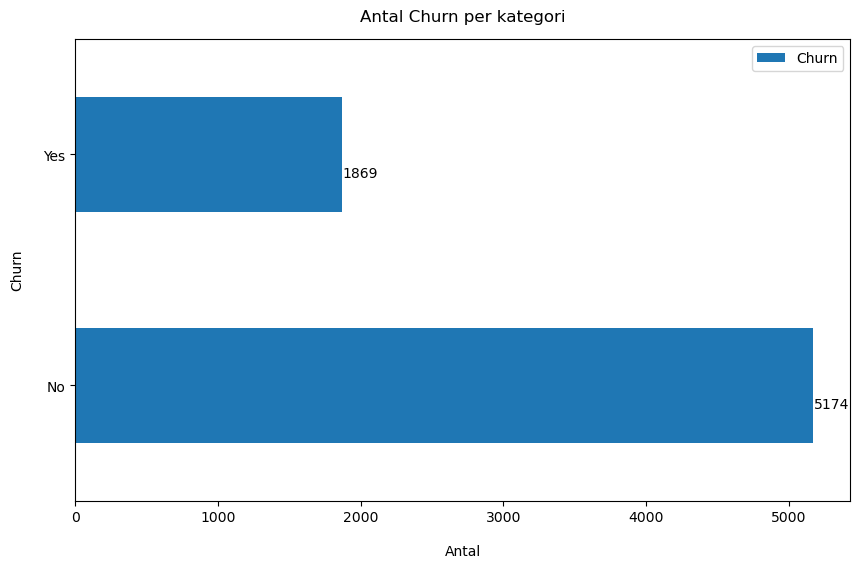

In [9]:
fig, ax = plt.subplots(figsize=(10, 6))
df['Churn'].value_counts().plot(kind='barh', ax=ax)

for i, v in enumerate(df['Churn'].value_counts()):
    ax.text(v + 3, i - 0.1, str(v), color='black')


plt.xlabel("Antal", labelpad=14)
plt.ylabel("Churn", labelpad=14)
plt.title("Antal Churn per kategori", y=1.02)


plt.legend()

Här ser vi att i hela datasetet så är det 1869 som kommer churna, medans 5174 inte churnar av olika anledningar, Dessa skall vi också ta reda på !

In [10]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

Här ser vi förhållandet mellan Churners och non-Churners i numeriska värden över hela datasetet. Dags att ta reda på hur mycket dessa nummer representeras i procent(%).

In [11]:
100*df['Churn'].value_counts()/len(df['Churn'])

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

Jag tar och gångrar hela df['Churn']värdet så jag får 100-delar. sen dividerar jag på hela värdet av Churn kolumnen för att få ut procentdelen av dem värdena.

Man ser direkt att datan är väldigt obalanserad då jag får ta och analysera datan med andra features för att få lite insikt.

Eftersom att förhållandet är så ojämnt mellan churners och non-churners 73% vs 27% så om jag tränar min modell på hela detta setet så kommer modellen att bli overfitted på träningsdatan och kommer få hög accuracy på testdatan men detta säger oss ingenting då den kommer få hög accuracy av att den läser av nonchurners väldigt bra. 

Vi får ta och välja här om vi skall använda oss av up-sampling eller down-sampling så vi kan få en jämnare ratio mellan churn vs non-churn till vår modell. Target ratio = 50/50.

#  Data conversion och rensning

In [12]:
df_copy = df.copy()

In [13]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


TotalCharges är ett object, Den vill jag ha som ett numeriskt värde.

In [14]:
df_copy.TotalCharges = pd.to_numeric(df_copy.TotalCharges, errors='coerce') #Gör totalcharges till numerisk värde.
df_copy.isnull().sum() #Kolla summan av null värden om det fanns några.

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Här ser vi om det finns några columner med null värden som vi i sådana fall får ta bort. TotalCharges verkar ha 11 stycken!

In [15]:
df_copy.loc[df_copy['TotalCharges'].isnull() == True]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


Här ser vi dem 11 stycken rader som har null värden i TotalCharges kolumnen. Eftersom det bara är 11 rader av 7043 så gör den så liten impact på vårat dataset så vi kan droppa dem med säkerhet.

In [16]:
df_copy.dropna(how = 'any', inplace=True) # Droppa Nan value rader i TotalCharges.

Eftersom vi har Tenure som en feature och jag vill kolla om kunder churnar baserat på Tenure. T.ex Om kunderna churnar efter 0-1 år, 2-3år, 4-5år, 5+år etc. Detta för att lättare få en översikt om efter hur länge kunder oftast Churnar.

In [17]:
print(df_copy.tenure.max()) #Max antal Tenure i tenure kolumnen

72


Nu vill jag gruppera tenure perioderna i olika grupper, separerade av tenure längd(12mån) för att lättare kunna jämnföra mot Churn. 

In [18]:
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]
df_copy['tenure_grupper'] = pd.cut(df_copy.tenure, range(1, 80, 12), right=False, labels = labels) 

In [19]:
df_copy['tenure_grupper'].value_counts()

1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: tenure_grupper, dtype: int64

Nu vill jag droppa den första kolumnen tenure och använda mig av den nya grupperade kolumnen istället som en feature

In [20]:
df_copy.drop(columns=['tenure'], axis=1, inplace=True)

In [21]:
df_copy.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_grupper
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


Nu kan vi se här att tenure är utbytt mot min nya kolumn tenure_grupper som visar vilken grupp kunden i raden tillhör baserat på tenure värde ( längden dem har varit trogen kund ).

# Univariate Analysis

Nu ska vi kolla relationen mellan alla features mot Churn så vi kan få en tydlig bild av hur många av varje feature som churnat.

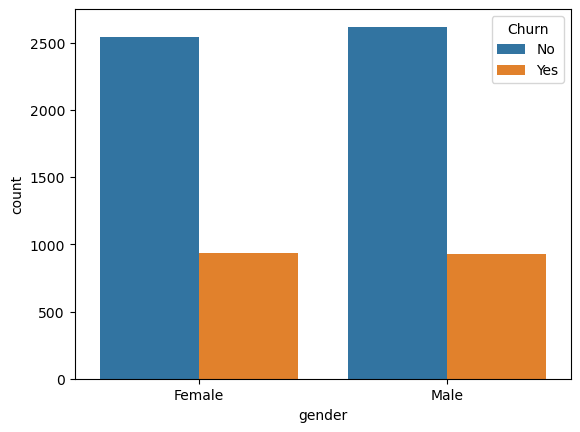

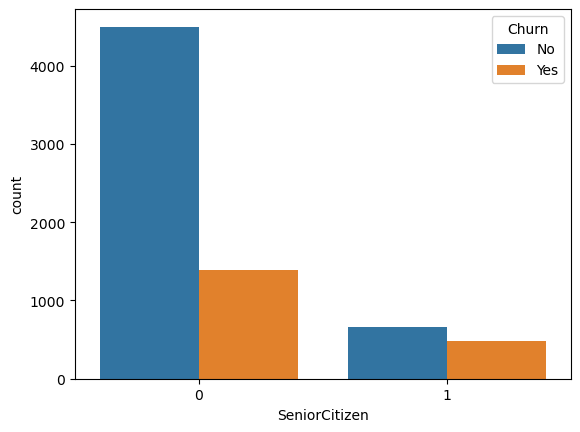

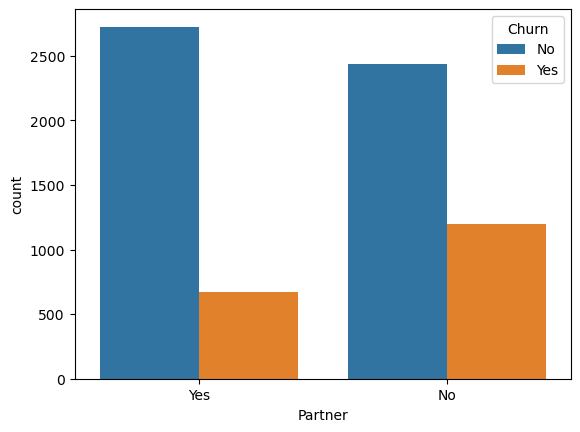

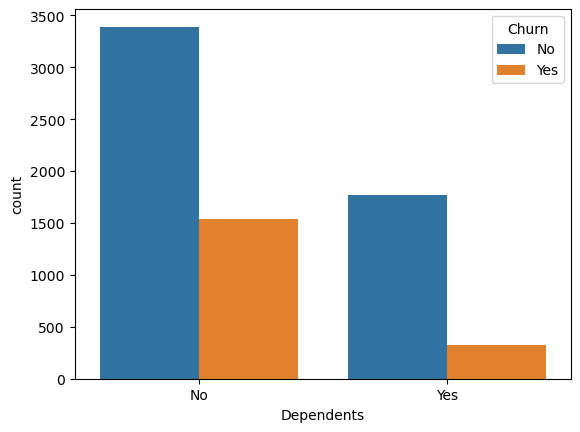

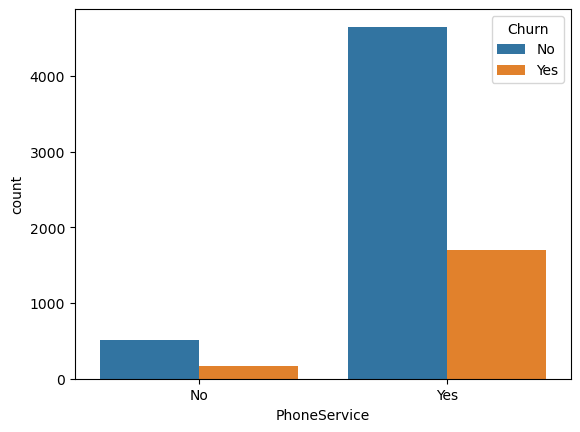

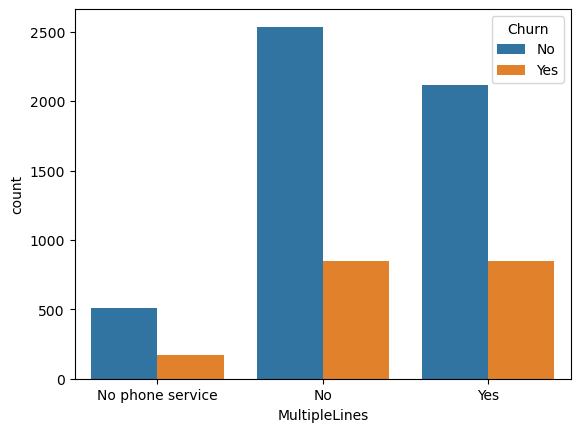

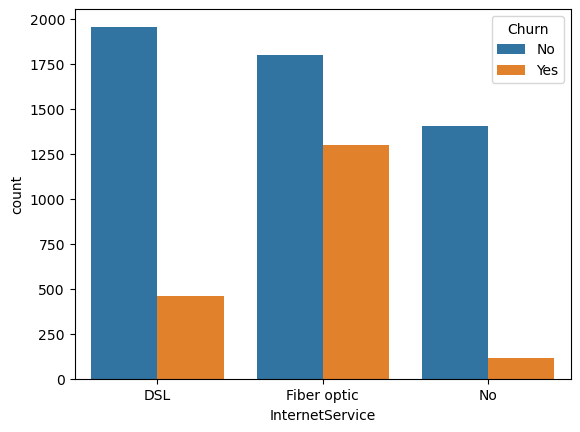

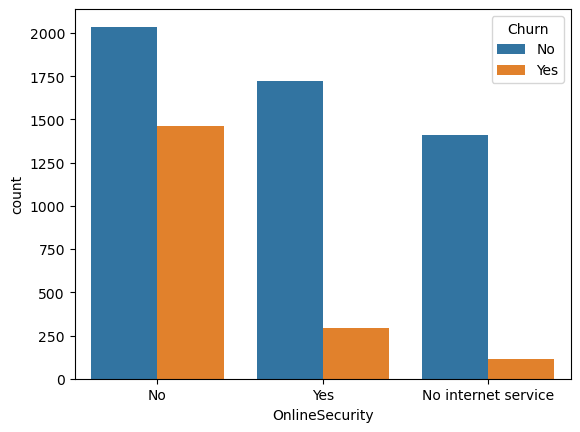

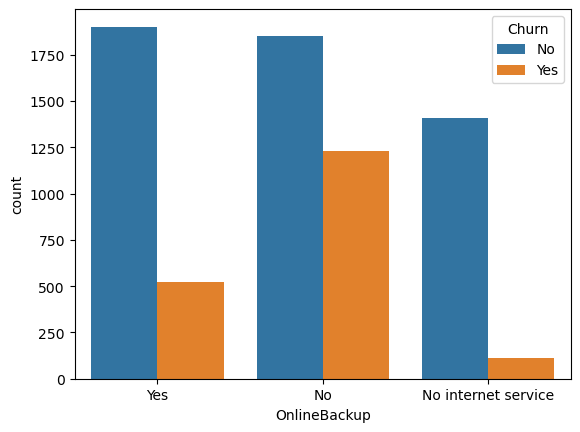

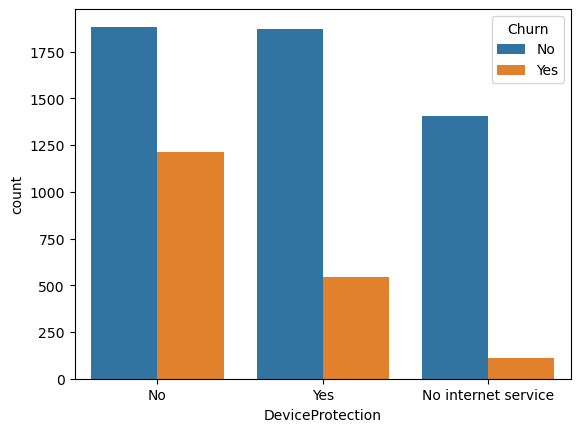

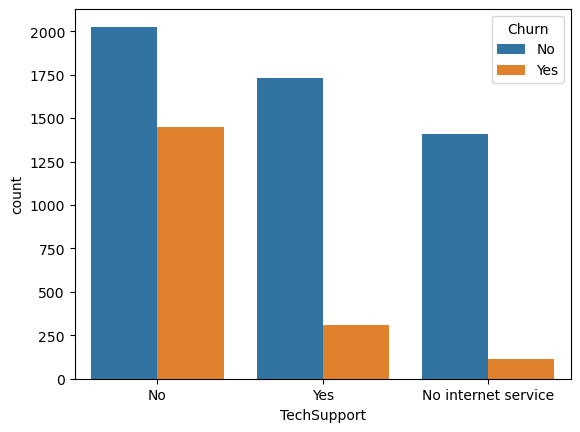

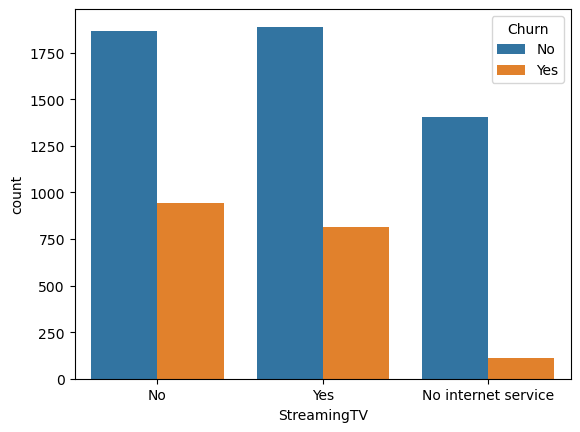

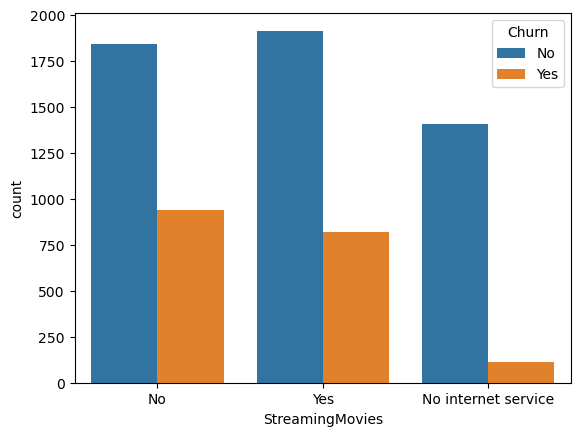

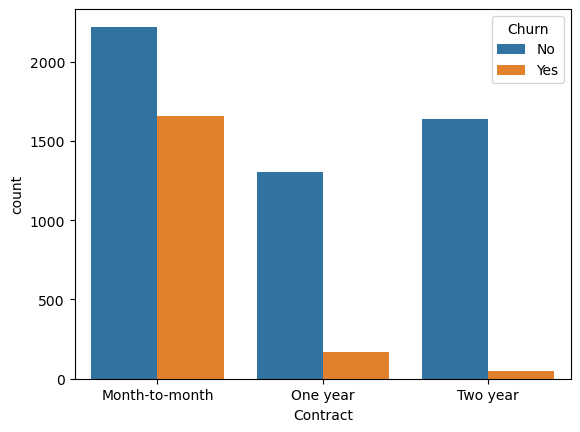

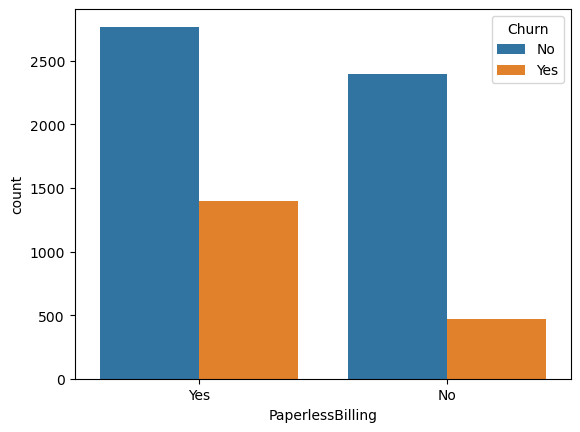

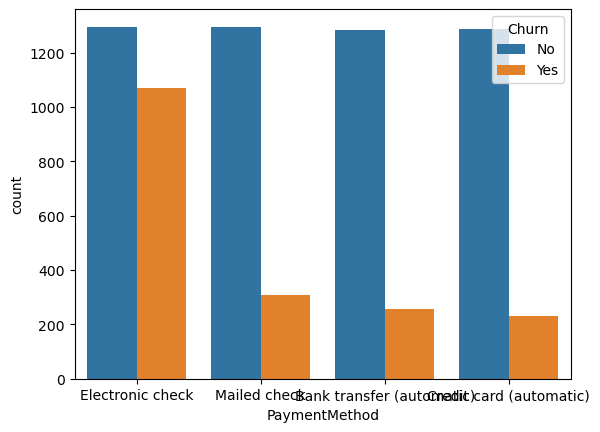

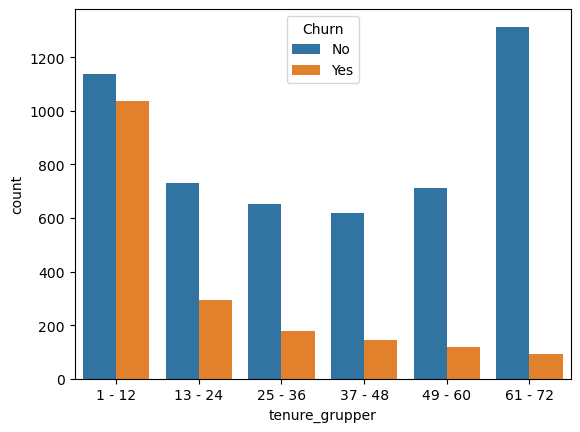

In [22]:
for i, predictor in enumerate(df_copy.drop(columns=['Churn', 'MonthlyCharges', 'TotalCharges'])):
    plt.figure(i)
    sns.countplot(data=df_copy, x=predictor, hue='Churn')

Vi kan se här att tydligt att t.ex första plotten att gender är väldigt jämn. dvs att det är lika många kvinnor som män som churnar. Med den informationen till hands så vet vi att gender spelar väldigt liten roll i våran churn prediction.

Kollar man på SeniorCitizen så kan vi se att ration mellan churners och non churners är väldigt hög. Det är nästan lika många av dem som klassificeras som Senior som churnar som inte churnar.

Partner är mer trolig att churn om värdet är nej, dvs kunden i fråga inte har en partner.

Dependents och partner är negativt correlerade, dvs har man ingen partner har man heller inga dependents.
Dependents är mer trolig att man churnar om svaret är nej, dvs att kunden inte har några dependents.

PhoneService är det dem som HAR PhoneService som är mer troliga att churn vs inte churn.

MultipleLines verkar inte ha någon direkt skillnad på churn därmed säger jag att vi skulle kunna droppa den kolumnen om vi vill.

På grafen som visar InternetService ser vi tydligt att det är en extremt hög churn på dem kunder som har Fiber optic som internet struktur. Kanske kan betyda att den tjänsten är undermålig eller för dyr.

OnlineSecurity är det dem som INTE HAR OnlineSecurity som är mer troliga att churn än inte churn.

OnlineBackup är det dem som INTE HAR OnlineBackup som är mer troliga att churn vs att inte churn.

DeviceProtection är det dem som INTE HAR DeviceProtection som är mer troliga att churn vs inte churn.

TechSupport är det dem som INTE HAR TechSupport som är mer troliga att churn vs inte churn.

StreamingTV och StreamingMovies har också väldigt jämn ratio och påvisar således ingen correlation med Churn så den kan också droppas om man vill.

Contract är det dem som HAR Month-to-month som är mest troliga att churn vs inte churn.

PaperlessBilling är det dem som HAR PaperlessBilling som är mest troliga att churn vs inte churn.

PaymentMethod är det dem som HAR ElectronicCheck som är mest troliga att churn vs inte churn.

tenure_grupper är det dem som TILLHÖR grupp 1-12 (1år) som är mest troliga att churn vs inte churn.

# Konvertera "yes" och "no" i Churn till numeriska värden

In [23]:
df_copy['Churn'] = np.where(df_copy.Churn == 'Yes', 1,0) #Gör om Str Yes och No till int 1(yes) och 0(no)

In [24]:
df_copy.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_grupper
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


Här ser vi att nu har Churn värdena 1 och 0 för yes och no

# Konvertera resten av dem kategoriska värdena till dummy variabler.

In [25]:
df_copy_dummies = pd.get_dummies(df_copy)
df_copy_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_grupper_1 - 12,tenure_grupper_13 - 24,tenure_grupper_25 - 36,tenure_grupper_37 - 48,tenure_grupper_49 - 60,tenure_grupper_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


Jag skall ta och titta så att TotalCharges ökar i takt med MonthlyCharges så allt ser bra ut och att vi inte har några konstigheter i i relationen där.

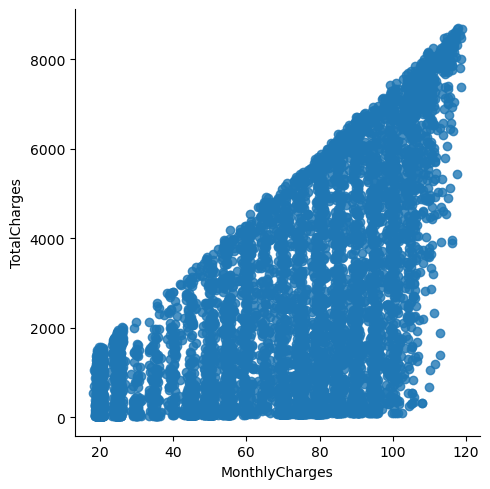

In [26]:
sns.lmplot(data=df_copy_dummies, x='MonthlyCharges', y='TotalCharges', fit_reg=False)

Det såg ut som väntat där. 

# KDEplot för att visualizera Churn vs Monthly Charges

Text(0.5, 1.0, 'MonthlyCharges mot Churn')

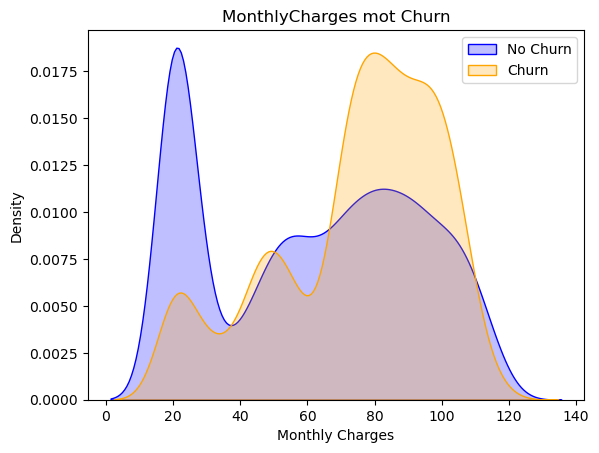

In [27]:
MonthlyCharges = sns.kdeplot(df_copy_dummies.MonthlyCharges[(df_copy_dummies['Churn'] == 0)], color="blue", shade=True)

MonthlyCharges = sns.kdeplot(df_copy_dummies.MonthlyCharges[(df_copy_dummies['Churn'] == 1)], color="orange", shade=True)

MonthlyCharges.legend(["No Churn", "Churn"], loc='upper right')
MonthlyCharges.set_ylabel('Density')
MonthlyCharges.set_xlabel('Monthly Charges')
MonthlyCharges.set_title('MonthlyCharges mot Churn')

Här ser vi tydligt att Churn är som högst när dem månatliga kostnaderna är höga. Mellan 65 till 110USD har högst Churn.
Vi gör likadant med vår TotalCharges kolumn

Text(0.5, 1.0, 'TotalCharges mot Churn')

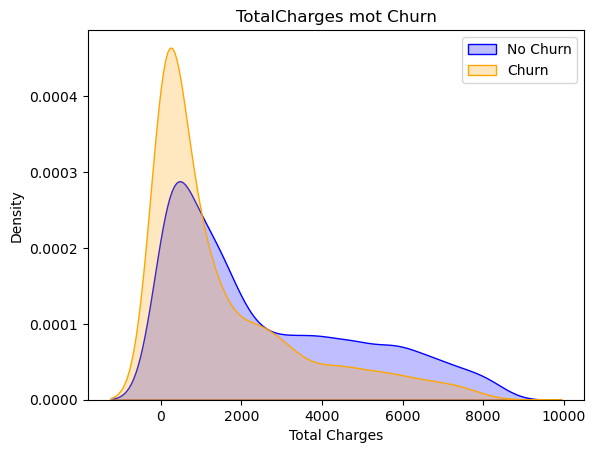

In [28]:
MonthlyCharges = sns.kdeplot(df_copy_dummies.TotalCharges[(df_copy_dummies['Churn'] == 0)], color="blue", shade=True)

MonthlyCharges = sns.kdeplot(df_copy_dummies.TotalCharges[(df_copy_dummies['Churn'] == 1)], color="orange", shade=True)

MonthlyCharges.legend(["No Churn", "Churn"], loc='upper right')
MonthlyCharges.set_ylabel('Density')
MonthlyCharges.set_xlabel('Total Charges')
MonthlyCharges.set_title('TotalCharges mot Churn')

Här ser vi att det är extremt hög Churn värde när totalcharges är högt vid låga tenure värden. Vilket betyder att det är hög Churn på dyra korta kontrakt och att detta resulterar i förhöjt kundbortfall. Man kanske skulle satsa på billigare kontrakt med en längre bindningstid för att minka churn i det fallet?

Med denna information till hands kan vi nu se att högre månadskostnad, lägre tenure period och en lägre totalcharge är direkt länkade med Churn såvida att dem alla har en hög densitet av Yes eller 1 i sin grupp.

# Om jag vill se korrelation med alla mina features. hur skulle den se ut ?

Jag väljer att skapa en bar plot figur som hjälper mig att se korrelationen med Churn på alla mina features för att se tydligt vilka som påverkar positivt, alltså vilka som Churn i respektive grupp, och negativt, vilka som INTE churn i respektive grupp.

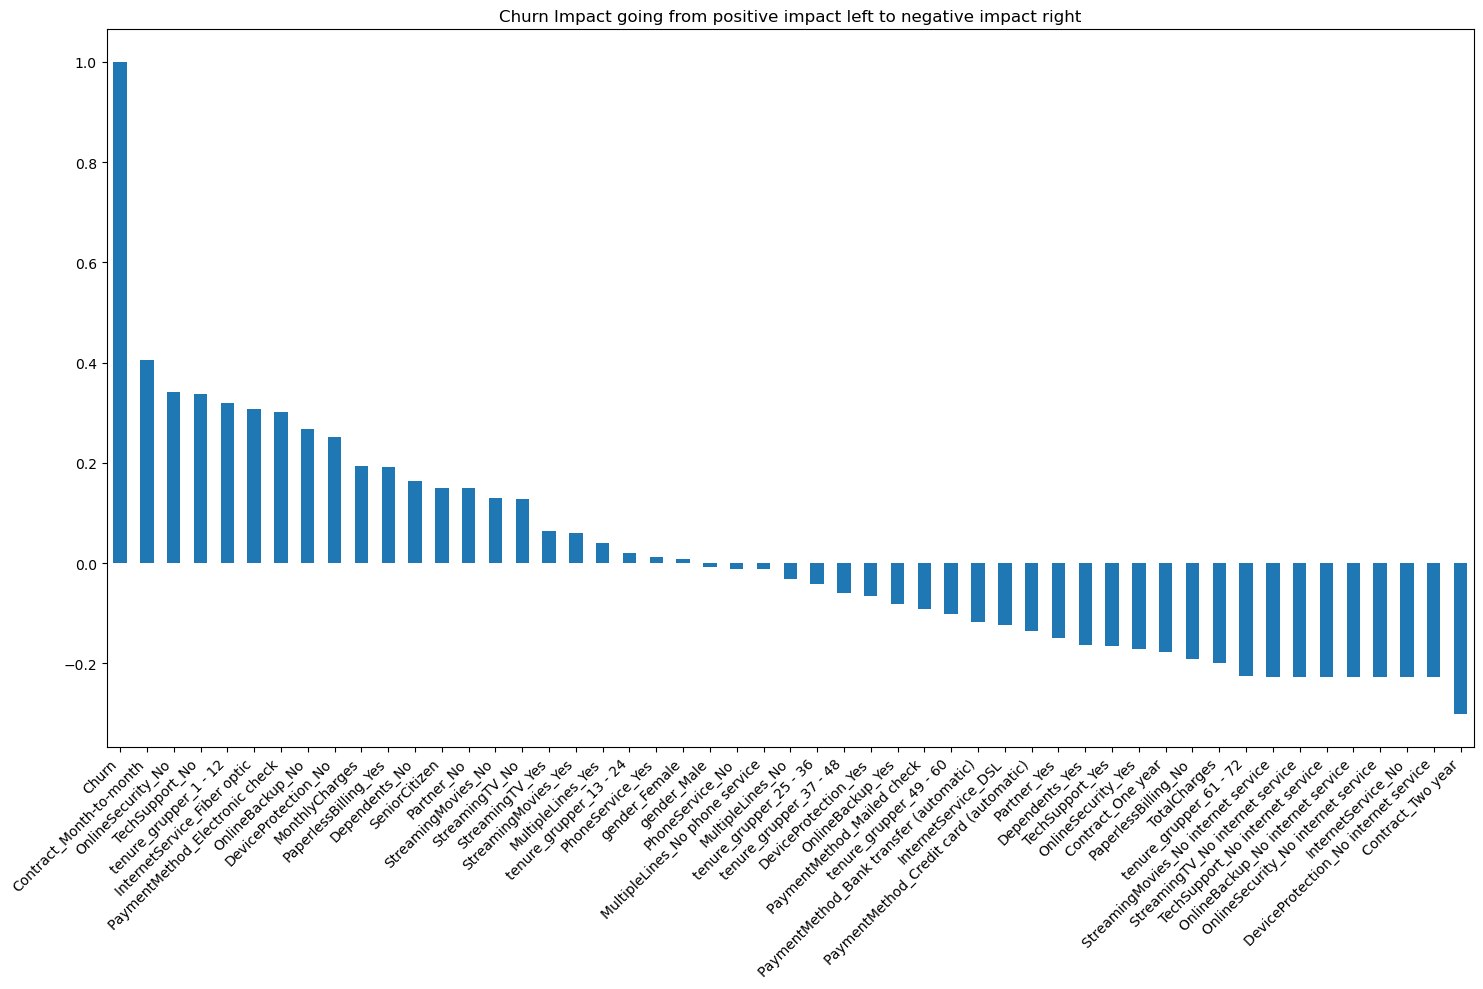

In [29]:
plt.figure(figsize=(15,10))
ax = df_copy_dummies.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.title("Churn Impact going from positive impact left to negative impact right")
plt.tight_layout()
plt.show()

Vad man kan dra för slutsatser av resultatet ovan är:
1. Högst Churn rate ser vi på kolumnerna: Month-to-month contracts, No online security, No Tech support, Första avtalsåret,  och Fiber Optic internet.
2. Lägst Churn rate ser vi på kolumnerna: contracts two year +, avtal som saknar internet uppkoppling, och trogna kunder som varit kunder i 5år+.
3. Vissa kolumner av datasetet har nästan ingen påverkan alls på Churn och dessa kolumner är: Multiple Lines, Gender, Phone Service

# Bivariate Analysis

Nu ska vi kolla korrelationen mellan två features och se om vi kan hitta några mönster där

Jag börjar med att skapa två dataframes av det förra och tar churn == 1 som target för df1 och churn == 0 för df2.

In [30]:
df1_target0 = df_copy.loc[df_copy["Churn"] == 0] #Non Churners
df1_target1 = df_copy.loc[df_copy["Churn"] == 1] #Churners <- Det är denna vi är intresserade av.

Hittade denna lilla funktion som tar mina argument och plottar en countplot av den, tänker använda mig av den till att plotta lite olika kolumner mot min df1_target1 variabel

In [31]:
def uniplot(df,col,title,hue=None):
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams['axes.labelsize'] = 10
    plt.rcParams['axes.titlesize'] = 12
    plt.rcParams['axes.titlepad'] = 15
    
    temp = pd.Series(data=hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width, 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x = col, order=df[col].value_counts().index, hue = hue, palette='bright')
    
    plt.show()

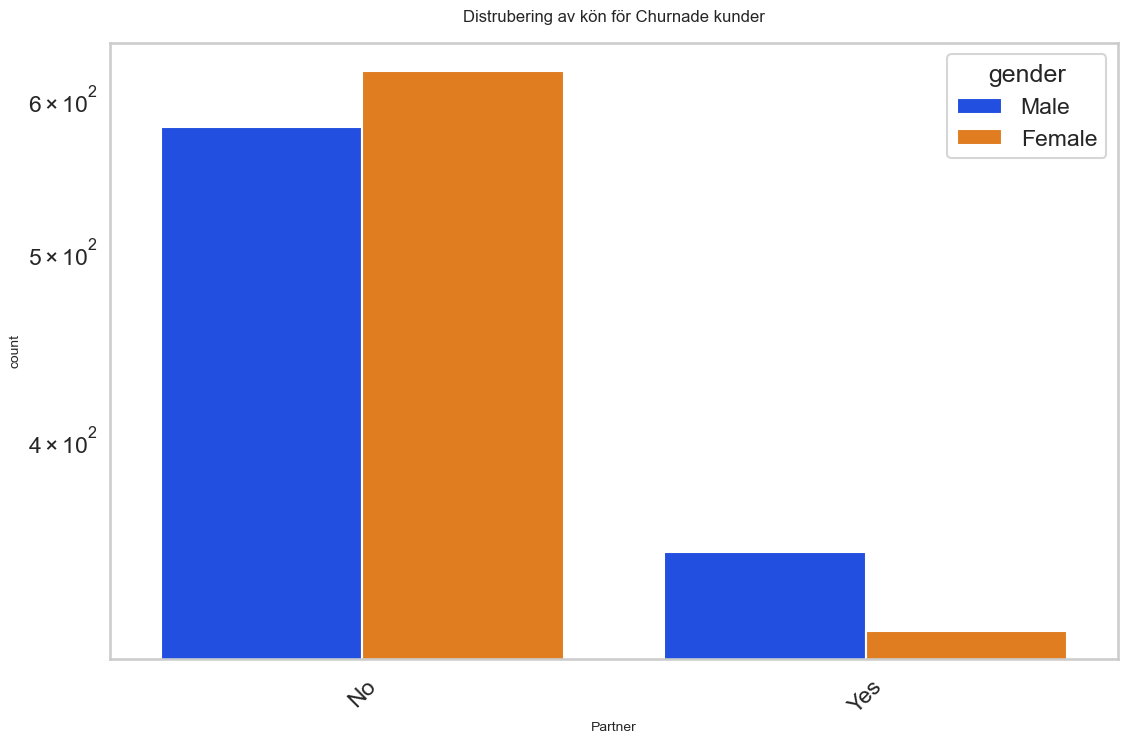

In [32]:
uniplot(df1_target1, col='Partner', title='Distrubering av kön för Churnade kunder', hue='gender')

Här kan man se att ingen kunder som inte har en partner är mer sannolika att Churn än dem som har partner.
Av dem som har partner är männen mer sannolika att churna.

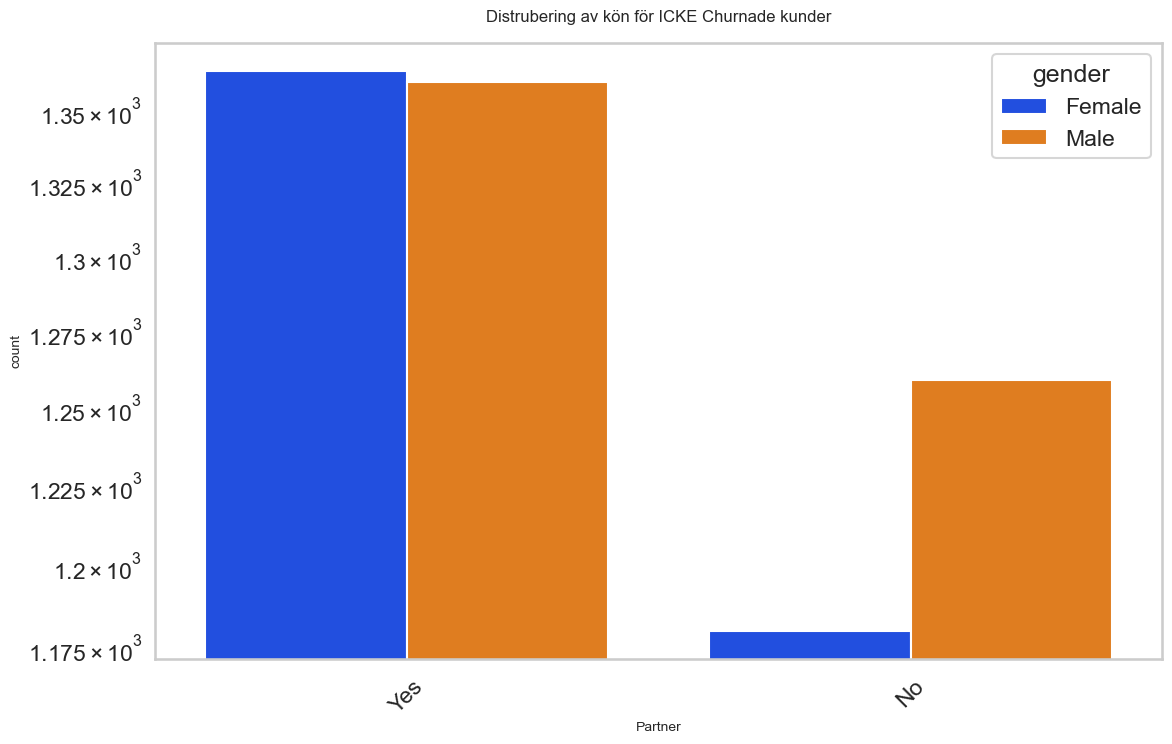

In [33]:
uniplot(df1_target0, col='Partner', title='Distrubering av kön för ICKE Churnade kunder', hue='gender')

Samma här, av dem som inte Churnat som har partner är männen fortfarande mer sannolika att churna

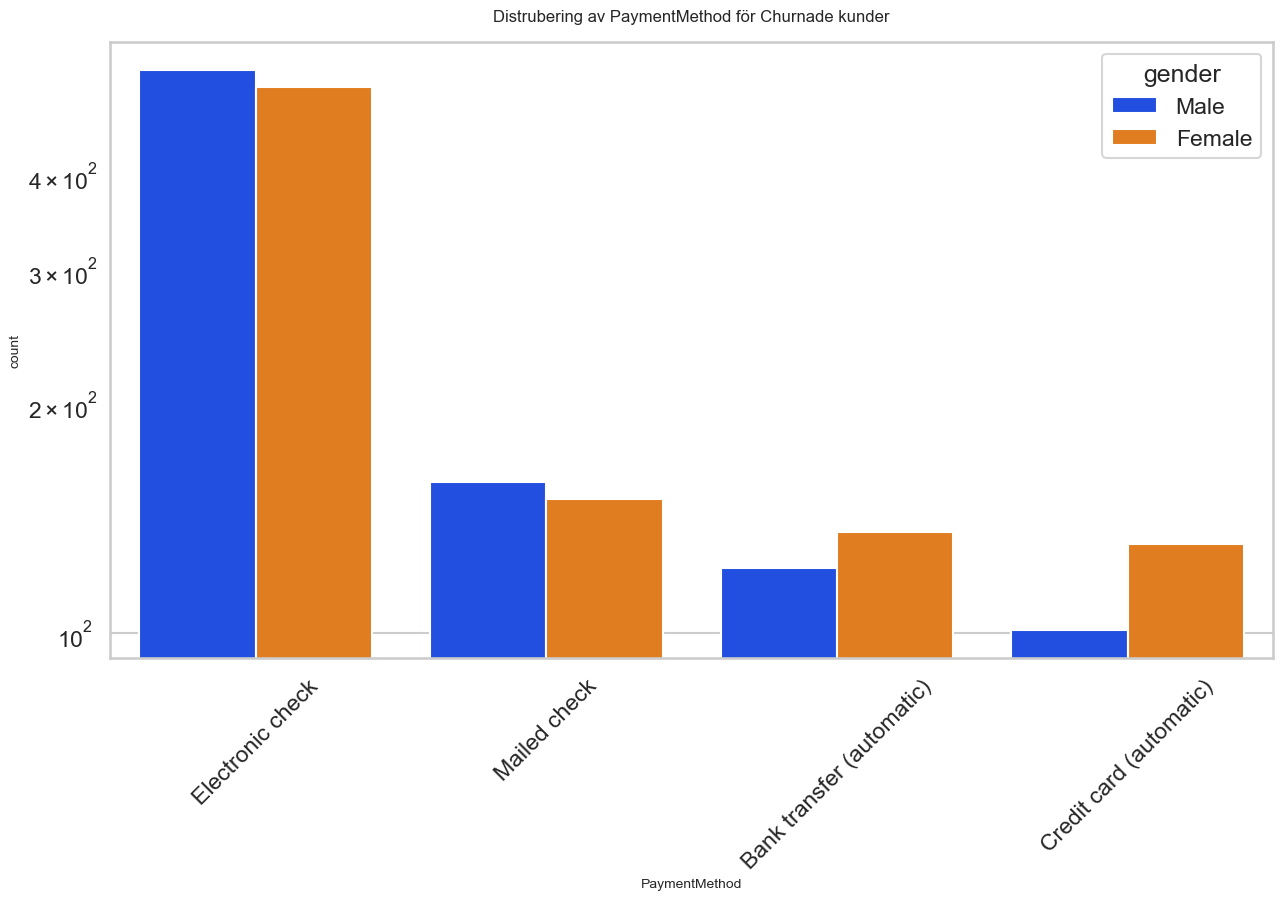

In [34]:
uniplot(df1_target1, col='PaymentMethod', title='Distrubering av PaymentMethod för Churnade kunder', hue='gender')

Electronic Check har högst Churn men det visste vi sedan tidigare, intressantare är väl att se att det appliceras på både män och kvinnor jämnlikt medans Credit card verkar domineras av kvinnliga churners. Detta går emot trenden där män är mest churners och är väldigt intressant.

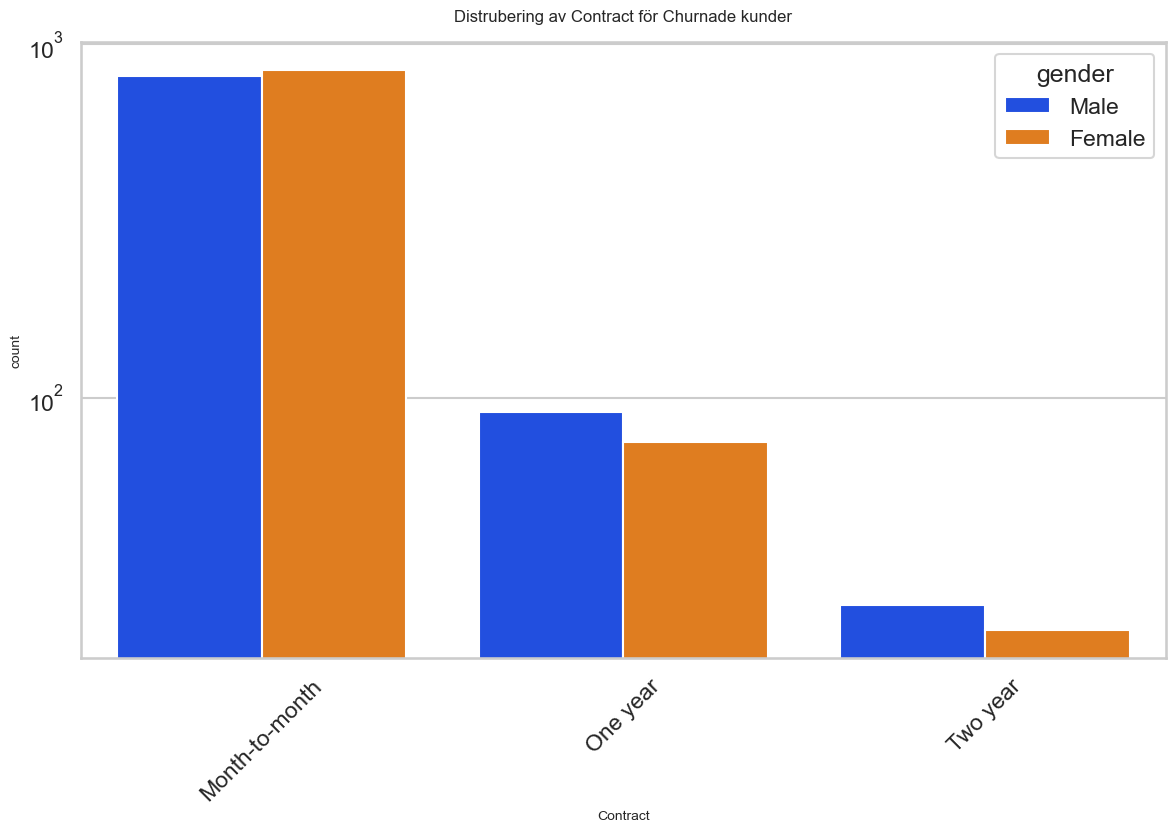

In [35]:
uniplot(df1_target1, col='Contract', title='Distrubering av Contract för Churnade kunder', hue='gender')

Contract visar oss bara det vi redan visste och eftersom ration här är 50/50 så ger detta oss inte så mycket

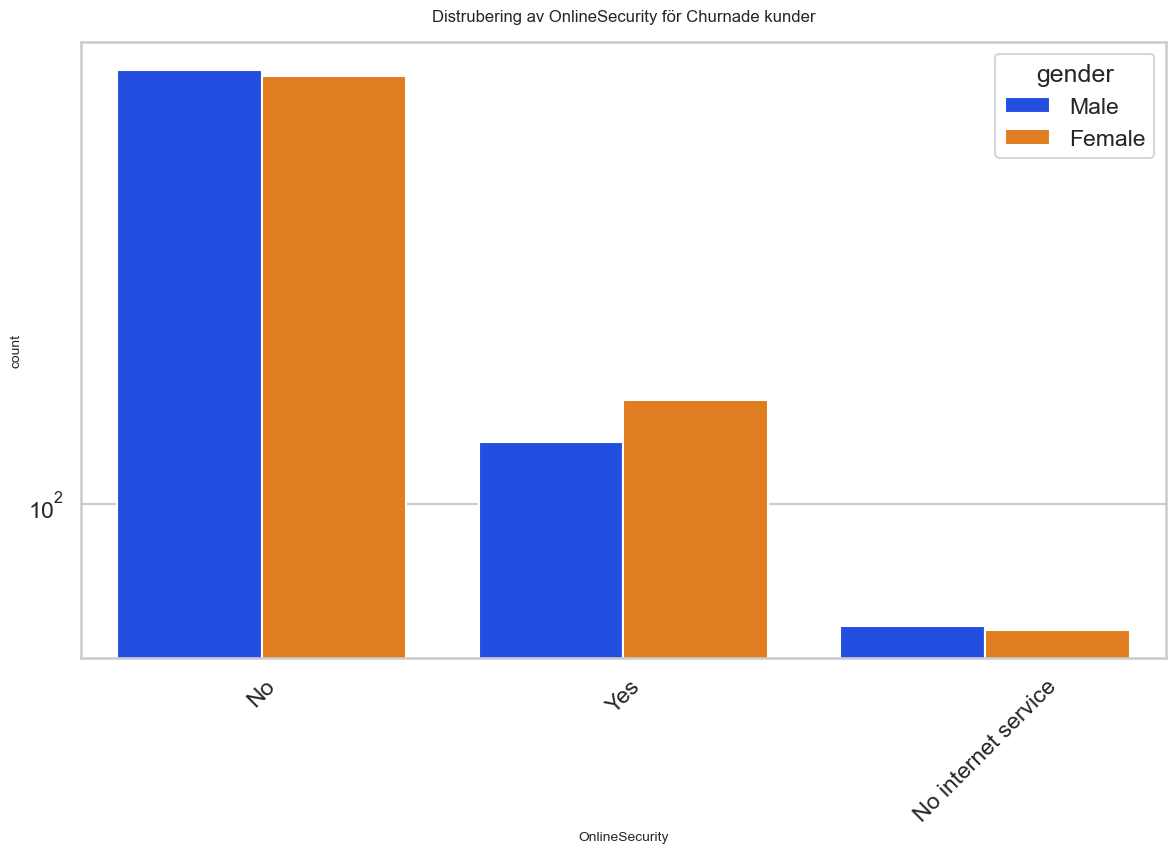

In [36]:
uniplot(df1_target1, col='OnlineSecurity', title='Distrubering av OnlineSecurity för Churnade kunder', hue='gender')

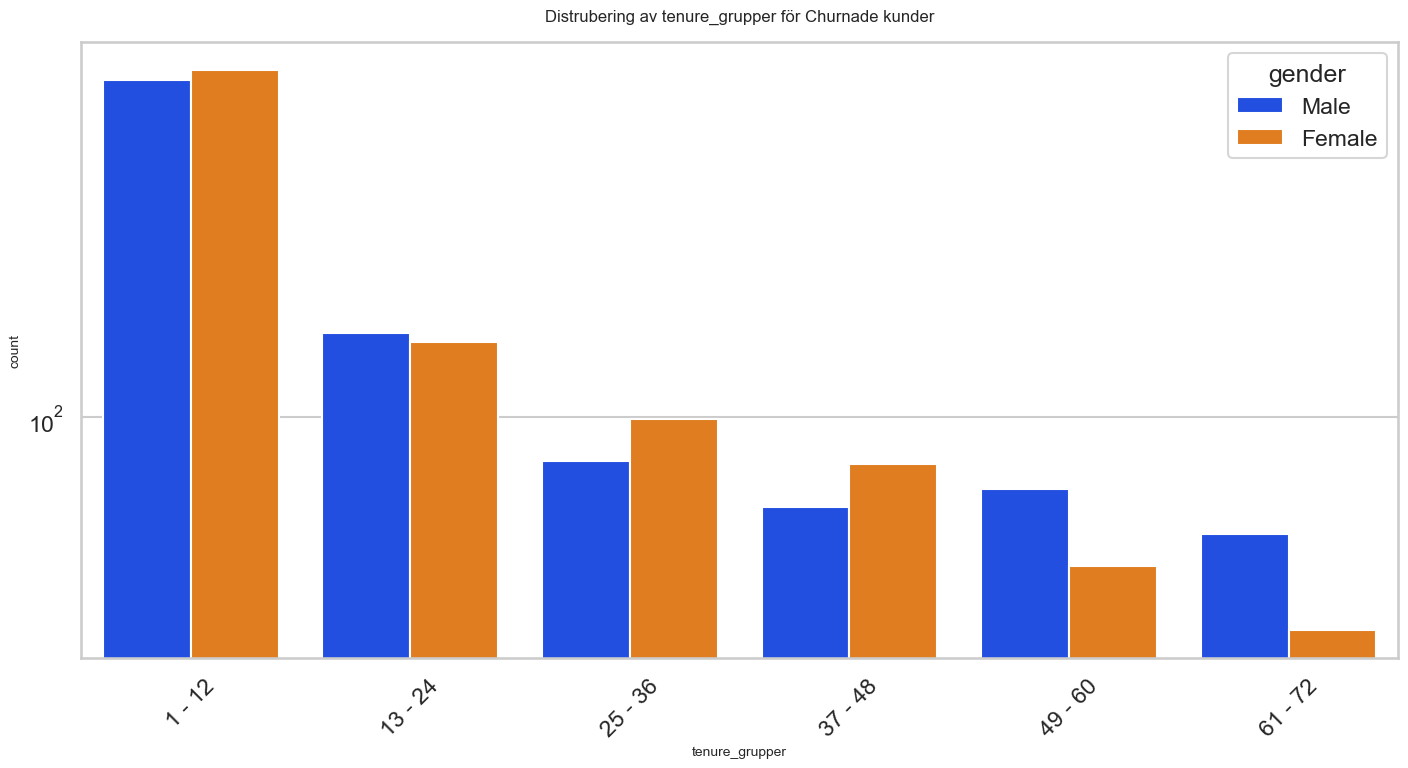

In [37]:
uniplot(df1_target1, col='tenure_grupper', title='Distrubering av tenure_grupper för Churnade kunder', hue='gender')

Här ser vi att i våra grupper så är könsfördelningen väldigt lik för dem som Churn. Det som utmärker sig är 49-60 och 61-72mån kunder så är det främst män som churnar. I övriga grupper så är det relativt jämn fördelning.

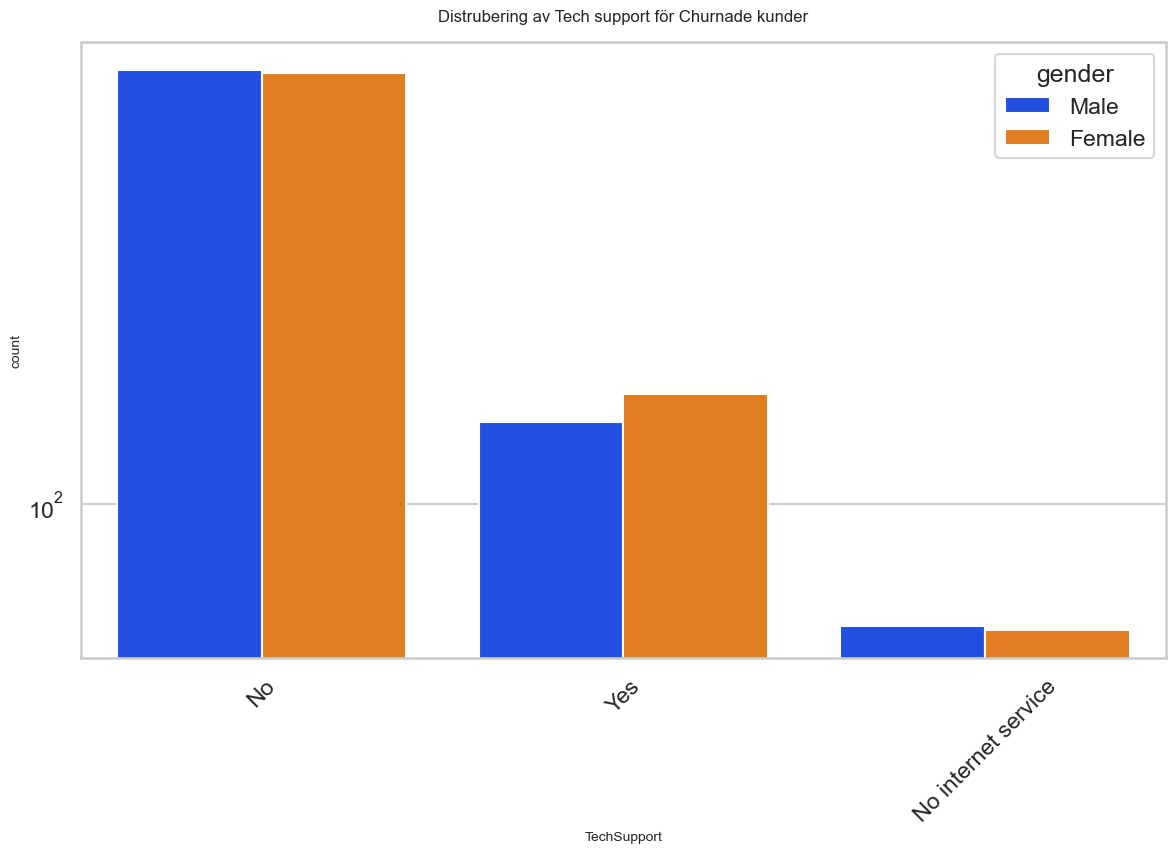

In [38]:
uniplot(df1_target1, col='TechSupport', title='Distrubering av Tech support för Churnade kunder', hue='gender')

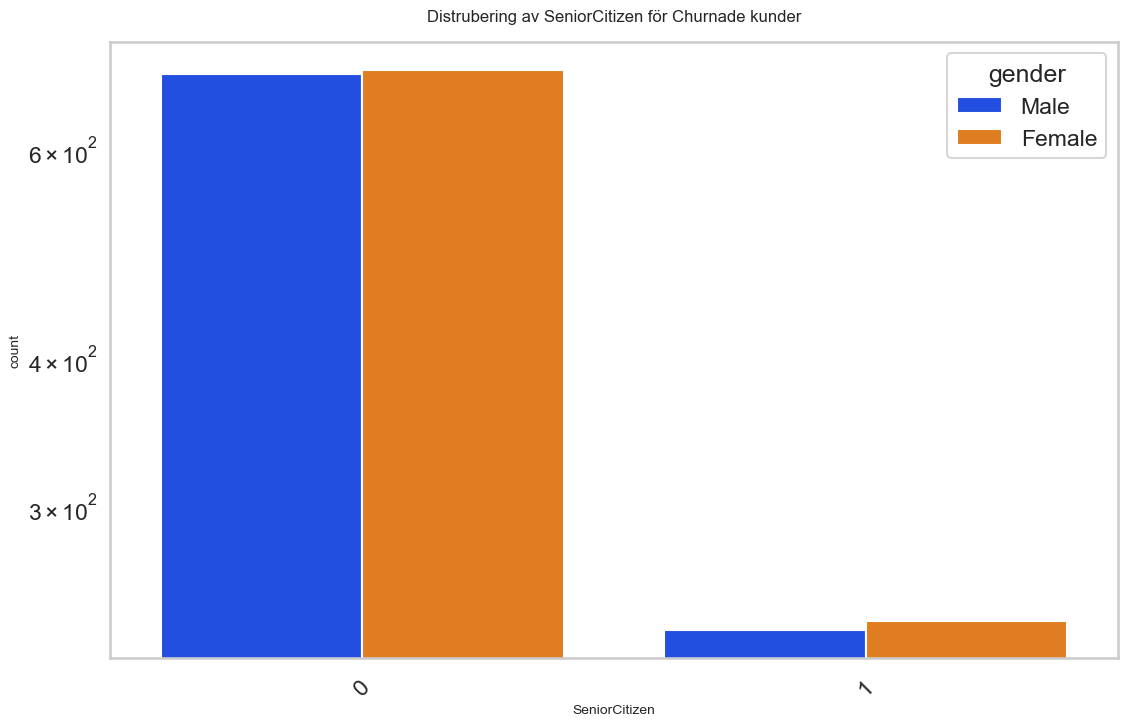

In [39]:
uniplot(df1_target1, col='SeniorCitizen', title='Distrubering av SeniorCitizen för Churnade kunder', hue='gender')

# Slutsats av EDA 

Då ska vi se vad vi har kommit fram till med informationen vi har till hands.

Lättast är att lista våran kunskap så vi tydligt ser vad vi har lärt oss.

1. Electronic Check betalsättet har det högsta antalet churners.
2. Kontrakts typen spelar stor roll, Month-to-month har väldigt högt antal churners medans 1-year och 2-year har låg churn.
3. Dem features som har högst påverkan på churn sedan är:

   1.No Online Security.
   
   2.No Tech Support.
   
   3.Tenure_grupper 1-12.
   
   4.Internet Service - Fiber Optic.
   
   5.No Online Backup
   
   6.No Device Protection
   
   7.Monthly Charges
   
   8.Paperless Billing
   
   9.No Dependents
   
   10.Non Senior Citizen

Det kan finnas många fler relationer och mönster som vi inte har sätt än men vi kan bara fortsätta att kolla olika kolumner mot churn för att se fler kopplingar men jag nöjer mig med dem 10 jag har identifierat sålänge.

Sist men inte minst så gör jag om min dummies copy av min DF till en ny csv fil att använda i mina modeller.

In [40]:
df_copy_dummies.to_csv('telcco_churn.csv')

# Dags att bygga en förutspående modell baserat på datan vi har samlat ihop hittils.

Importera Nödvändiga paket

In [41]:
#pip install imblearn

In [42]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN 

In [43]:
df = pd.read_csv('telcco_churn.csv')

In [44]:
df.head()

,Unnamed: 0,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_grupper_1 - 12,tenure_grupper_13 - 24,tenure_grupper_25 - 36,tenure_grupper_37 - 48,tenure_grupper_49 - 60,tenure_grupper_61 - 72
0,0,0,29.85,29.85,0,1,0,0,1,1,...,0,0,1,0,1,0,0,0,0,0
1,1,0,56.95,1889.50,0,0,1,1,0,1,...,0,0,0,1,0,0,1,0,0,0
2,2,0,53.85,108.15,1,0,1,1,0,1,...,0,0,0,1,1,0,0,0,0,0
3,3,0,42.30,1840.75,0,0,1,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,4,0,70.70,151.65,1,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0


Jag droppar Unnamed då den inte är intressant

In [45]:
df = df.drop('Unnamed: 0', axis=1)

In [46]:
df.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_grupper_1 - 12,tenure_grupper_13 - 24,tenure_grupper_25 - 36,tenure_grupper_37 - 48,tenure_grupper_49 - 60,tenure_grupper_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


Låt oss nu skapa X och Y variabler där X är mina oberoende variabler och Y är min beroende variabel aka 'Churn'

In [47]:
x = df.drop('Churn', axis=1)
x

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_grupper_1 - 12,tenure_grupper_13 - 24,tenure_grupper_25 - 36,tenure_grupper_37 - 48,tenure_grupper_49 - 60,tenure_grupper_61 - 72
0,0,29.85,29.85,1,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,1,1,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,0,1,1,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,1,1,0,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,0,1,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,84.80,1990.50,0,1,0,1,0,1,0,...,0,0,0,1,0,1,0,0,0,0
7028,0,103.20,7362.90,1,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
7029,0,29.60,346.45,1,0,0,1,0,1,1,...,0,0,1,0,1,0,0,0,0,0
7030,1,74.40,306.60,0,1,0,1,1,0,0,...,0,0,0,1,1,0,0,0,0,0


In [48]:
y = df['Churn']
y

0       0
1       0
2       1
3       0
4       1
       ..
7027    0
7028    0
7029    0
7030    1
7031    0
Name: Churn, Length: 7032, dtype: int64

Nu när vi har våra X och Y variabler upprättade som features(x) och targetvariable(y), låt oss splitta dem in i tränings och test data.

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2) #Jag använder mig av 80/20 split av träning/test data.

# Decision Tree Classifier

In [50]:
model_dt = DecisionTreeClassifier(criterion='gini', random_state=100, max_depth=6, min_samples_leaf=8)
# Notera att det är här vi kan finjustera Hyperparametrarna för modellen för att försöka hitta dem bästa värdena.

Jag har nu instansierat DT classifier klassen med Random_state=100 för återskapande av resultat.

Dags att använda .fit() på datan.

In [51]:
model_dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [52]:
y_pred = model_dt.predict(x_test)

In [53]:
y_pred

array([0, 1, 0, ..., 0, 1, 0], dtype=int64)

Kollar om det bara är 0 eller om det finns 1 i arrayen med

In [54]:
unique_vals = np.unique(y_pred)

print(len(unique_vals))

2


Verkar vara 2 värden alltså 0 och 1

Jag väljer att printa ut mina scores på modellen för att se hur vi ligger till med modellen!

In [55]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1038
           1       0.62      0.49      0.55       369

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.78      0.79      0.78      1407



Här kan vi se att modellen inte var så bra på att förutspå churn då alla värden som tillhör 1 (alltså churn) är relativt låga, runt 50%. Det finns olika förklaringar till detta. I detta fallet skulle jag tro att det är som jag nämnde tidigare, att vi har ett obalanserat dataset. Låt oss prova använda imblearn modulen och paketet: SMOTEENN.

In [56]:
sm = SMOTEENN()
xr_train, yr_train = sm.fit_resample(x_train, y_train)

In [57]:
model_dt_resampled = DecisionTreeClassifier(criterion='gini', random_state=100, max_depth=6, min_samples_leaf=8)

In [58]:
model_dt_resampled.fit(xr_train, yr_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

Nu vill jag återigen göra en prediction av min modell efter jag har down-scalat datasetet med hjälp av SMOTEEN modulen

In [59]:
y_pred_resampled = model_dt_resampled.predict(x_test)

Återigen kollar vi av classification reporten för att se om det blev bättre eller sämre.

In [60]:
print(classification_report(y_test, y_pred_resampled, labels=[0,1])) 

              precision    recall  f1-score   support

           0       0.89      0.74      0.81      1038
           1       0.51      0.75      0.61       369

    accuracy                           0.75      1407
   macro avg       0.70      0.75      0.71      1407
weighted avg       0.79      0.75      0.76      1407



Precisionen för klass 0 är 0,92, vilket innebär att av alla förutsagda instanser för klass 0 är 92% faktiskt sanna negativa. Återkallandet för klass 0 är 0,73, vilket innebär att modellen korrekt identifierade 73% av alla instanser som verkligen tillhör klass 0.
F1-poängen för klass 0 är 0,81, vilket är det harmoniska medelvärdet av precision och återkallande för den klassen.


På liknande sätt är precisionen, återkallandet och F1-poängen för klass 1 (standard) 0,54, 0,82 respektive 0,65. Detta innebär att modellen korrekt identifierade 82% av alla instanser som verkligen tillhör klass 1, men endast 54% av alla förutsagda instanser för klass 1 var faktiskt sanna positiva.

Den totala träffsäkerheten för modellen på testsetet är 0,76, vilket innebär att den korrekt klassificerade 76% av alla instanser. 

Generellt sett visar resultaten att modellen har rimlig noggrannhet, men dess prestanda är inte balanserad över de två klasserna. Modellen har hög precision men låg återkallelse för klass 0, vilket innebär att den är bra på att identifiera sanna negativa men kan missa vissa sanna positiva. För klass 1 har modellen hög återkallelse men låg precision, vilket innebär att den identifierar de flesta sanna positiva men har en hög falsk positiv frekvens

Låt oss testa med en annan model, en som är en förlängning av den vi har gjort nu nämnligen Random Forest!

# Random Forest Classifier

Jag börjar med att importera RandomForestClassifiern jag skall använda mig av.

In [61]:
from sklearn.ensemble import RandomForestClassifier

In [62]:
# Jag kopierar överstående kod och ändrar lite samt att jag lägger till 100 träd i min lilla skog.
model_rf = RandomForestClassifier(n_estimators=100, criterion='gini', random_state=100, max_depth=6, min_samples_leaf=8, verbose=1)
model_rf.fit(x_train, y_train)
y_pred_rf = model_rf.predict(x_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Kollar dess score:

In [63]:
print(classification_report(y_test, y_pred_rf, labels=[0,1])) 

              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1038
           1       0.67      0.44      0.53       369

    accuracy                           0.80      1407
   macro avg       0.75      0.68      0.70      1407
weighted avg       0.78      0.80      0.78      1407



helt ok värden. Lite som förra modellen innan vi scalade datasetet med SMOTEENN. Vi provar att applicera samma teknik som på förra modellen.

In [64]:
xr_train, yr_train = sm.fit_resample(x_train, y_train)

In [65]:
model_rf_resampled = RandomForestClassifier(n_estimators=100, criterion='gini', random_state=100, max_depth=6, min_samples_leaf=8, verbose=1)

In [66]:
model_rf_resampled.fit(xr_train, yr_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100,
                       verbose=1)

In [67]:
y_pred_resampled_rf = model_rf_resampled.predict(x_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [68]:
print(classification_report(y_test, y_pred_resampled_rf, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1038
           1       0.50      0.77      0.61       369

    accuracy                           0.74      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.79      0.74      0.75      1407



In [69]:
print(confusion_matrix(y_test, y_pred_resampled_rf)) #1104/1185 = Accuracy = 93% (Dessa värden är när jag körde första gången.)

[[752 286]
 [ 84 285]]


# KNN

Jag börjar även här att importera paketet jag skall använda mig av !

In [70]:
from sklearn.neighbors import KNeighborsClassifier #import av modul.

In [71]:
model_KNN = KNeighborsClassifier(n_neighbors=5) #skapandet av model.

In [72]:
model_KNN.fit(x_train, y_train) #Träna och testa modellen.
y_pred_KNN = model_KNN.predict(x_test)

C:\Users\david\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [73]:
print(classification_report(y_test, y_pred_KNN, labels=[0,1])) #Kollar resultat återigen. (Dessa värden är när jag körde första gången.)

              precision    recall  f1-score   support

           0       0.82      0.86      0.84      1038
           1       0.54      0.46      0.50       369

    accuracy                           0.76      1407
   macro avg       0.68      0.66      0.67      1407
weighted avg       0.75      0.76      0.75      1407



Som väntat, dåliga resultat här med. vi testar att använda SMOTEEN för att balancera värdena igen och testar som förra modellerna.

In [74]:
xr_train, yr_train = sm.fit_resample(x_train, y_train) 

In [75]:
model_KNN_resampled = KNeighborsClassifier(n_neighbors=3) #default ör 5 nearest neighbors men jag testar med 3 för det känns kul.

In [76]:
model_KNN_resampled.fit(xr_train, yr_train) #Träna modellen.

KNeighborsClassifier(n_neighbors=3)

In [77]:
y_pred_resampled_KNN = model_KNN_resampled.predict(x_test)

C:\Users\david\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [78]:
print(classification_report(y_test, y_pred_resampled_KNN, labels=[0,1])) 

              precision    recall  f1-score   support

           0       0.87      0.70      0.77      1038
           1       0.45      0.70      0.55       369

    accuracy                           0.70      1407
   macro avg       0.66      0.70      0.66      1407
weighted avg       0.76      0.70      0.72      1407



vi kollar confusion_matrix också!

In [79]:
print(confusion_matrix(y_test, y_pred_resampled_KNN))  

[[725 313]
 [109 260]]


# Logistic Regression Classifier

Återigen importerar vi våran model vi skall använda

In [80]:
from sklearn.linear_model import LogisticRegression #importera modul

In [81]:
model_lr = LogisticRegression(max_iter=1000, verbose=1) # Skapa model

In [82]:
model_lr.fit(x_train, y_train) #Träna och testa modellen.
y_pred_lr = model_lr.predict(x_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


In [83]:
print(classification_report(y_test, y_pred_lr, labels=[0,1])) 

              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1038
           1       0.65      0.50      0.56       369

    accuracy                           0.80      1407
   macro avg       0.74      0.70      0.71      1407
weighted avg       0.79      0.80      0.79      1407



Ja helt okej värden för att vara ett obalancerat dataset vi har använt, låt oss nu använda det balanserade som innan

In [84]:
xr_train, yr_train = sm.fit_resample(x,y) 

In [85]:
model_lr_resampled = LogisticRegression(max_iter=1000, class_weight='balanced', verbose=1) #Skapa model 

In [86]:
model_lr_resampled.fit(xr_train, yr_train) #Träna modellen.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished


LogisticRegression(class_weight='balanced', max_iter=1000, verbose=1)

In [87]:
y_pred_resampled_lr = model_lr_resampled.predict(x_test)

In [88]:
print(classification_report(y_test, y_pred_resampled_lr, labels=[0,1])) #Printa ut dem nya resultaten.

              precision    recall  f1-score   support

           0       0.87      0.80      0.83      1038
           1       0.54      0.67      0.60       369

    accuracy                           0.77      1407
   macro avg       0.71      0.74      0.72      1407
weighted avg       0.79      0.77      0.77      1407



Sist men inte minst kollar vi Accuracy på sista modelen också avslutningsvis.

In [89]:
print(confusion_matrix(y_test, y_pred_resampled_lr))  

[[829 209]
 [120 249]]


In [90]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.83      0.89      0.86      1038\n           1       0.62      0.49      0.55       369\n\n    accuracy                           0.79      1407\n   macro avg       0.73      0.69      0.70      1407\nweighted avg       0.78      0.79      0.78      1407\n'

# Göra lite GridSearch för att se bästa Hyperparameters

In [91]:
from sklearn.model_selection import GridSearchCV #Importera GridsearchCV

Skapa alla parameter grids för alla modeller.

In [92]:
dt_param_grid = {'criterion': ['gini', 'entropy'], 'max_depth': [2, 4, 6, 8, 10]}
rf_param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [2, 4, 6, 8, 10]}
knn_param_grid = {'n_neighbors': [3, 5, 7, 9, 11], 'weights': ['uniform', 'distance']}
lr_param_grid = {'penalty': ['l2', 'none'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}

Skapa alla mina classifiers.

In [93]:
dt_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()
knn_clf = KNeighborsClassifier()
lr_clf = LogisticRegression(max_iter=1000)

Skapa en gridsearch för varje classifier

In [94]:
dt_grid_search = GridSearchCV(dt_clf, dt_param_grid, cv=5, scoring='f1')
rf_grid_search = GridSearchCV(rf_clf, rf_param_grid, cv=5, scoring='f1')
knn_grid_search = GridSearchCV(knn_clf, knn_param_grid, cv=5, scoring='f1')
lr_grid_search = GridSearchCV(lr_clf, lr_param_grid, cv=5, scoring='f1')

Träna modellerna för att se bästa hyperparameter.

In [95]:
dt_grid_search.fit(x_train, y_train)
rf_grid_search.fit(x_train, y_train)
knn_grid_search.fit(x_train, y_train)
lr_grid_search.fit(x_train, y_train)

C:\Users\david\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\david\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\david\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\david\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\david\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\david\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l2', 'none']},
             scoring='f1')

Printa ut bästa parametrarna för varje model

In [96]:
print("Decision Tree best parameters: ", dt_grid_search.best_params_)
print("Decision Tree best F1 score: ", dt_grid_search.best_score_)
print("Random Forest best parameters: ", rf_grid_search.best_params_)
print("Random Forest best F1 score: ", rf_grid_search.best_score_)
print("KNN best parameters: ", knn_grid_search.best_params_)
print("KNN best F1 score: ", knn_grid_search.best_score_)
print("Logistic Regression best parameters: ", lr_grid_search.best_params_)
print("Logistic Regression best F1 score: ", lr_grid_search.best_score_)

Decision Tree best parameters:  {'criterion': 'gini', 'max_depth': 2}
Decision Tree best F1 score:  0.5872202243204437
Random Forest best parameters:  {'max_depth': 8, 'n_estimators': 100}
Random Forest best F1 score:  0.5685270269030747
KNN best parameters:  {'n_neighbors': 7, 'weights': 'distance'}
KNN best F1 score:  0.5124513553748127
Logistic Regression best parameters:  {'C': 10, 'penalty': 'l2'}
Logistic Regression best F1 score:  0.5837185843376729


# SLUT PÅ INLÄMNINGEN.